# Tecnológico de Costa Rica

## Curso EL 4702

## Proyecto 1 - Estadística Descriptiva

## Medidas de tendencia y dispersión

## Grupo 3

A continuación se presentan las funciones desarrolladas para calcular las medidas de tendencia y dispersión, además de los resultados de aplicar dichas funciones a los datos de humedad capturados en la sala.

**Extracción y ordenamiento de los datos con Quicksort**

In [287]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# Extraccion de datos del del archivo energydata_complete.csv

filename = 'energydata_complete.csv' # Nombre/ruta del archivo

# Esta funcion lee el archivo csv y guarda los datos en un array
# parametros: fname: nombre/ruta del archivo, delimiter: delimitador de las columnas, skip_header: ignora la primera linea, 
# dtype: especifica el tipo de datos (None para deteccion automatica), encoding: decodificacion (None para descartarla)
# usecols: selecciona las columnas a leer
datos = np.genfromtxt(filename, delimiter = ';', skip_header = 1, dtype = None, encoding = None, usecols = [0, 6])

# Se extraen los datos de humedad y tiempo en arrays aparte
# El tiempo se debe convertir de strings a un tipo de dato datetime para utilizarse con
# matploptlib en los graficos, se utiliza la funcion strptime para extraer dichas fechas de los strings
# siendo el parametro "d" el valor en si, y '%d/%m/%Y %H:%M' el formato de la fecha/hora

_tiempo = np.array([elem[0] for elem in datos]) # se extrae primero en un array temporal ya que en el original, "datos", se encuentran en tuplas
tiempo = [dt.datetime.strptime(d,'%d/%m/%Y %H:%M') for d in _tiempo]

humedad_sin_orden = np.array([elem[1] for elem in datos]) # datos de humedad sin ordenar para utilizarse en los graficos lineales
humedad = np.array(humedad_sin_orden, copy=True)          # datos de humedad ordenados para el diagrama de cajas y el histograma

# Se ordenan los datos usando la funcion sort de numpy, utilizando el algoritmo quicksort por ser uno muy comun
humedad.sort(kind = 'quicksort')

**Funciones de las medidas de tendencia**

Todas las funciones para medidas de tendencia y dispersión reciben como parámetro un array de números ordenado.

In [288]:
# Funcion que calcula el promedio de un array
def promedio(lista):
    total = 0
    for n in range(len(lista)):
        total += lista[n]
    return total/(n + 1)

# Funcion que calcula la moda de un array
def moda(lista):
    # Se organiza el array en un diccionario y se cuenta el numero de repeticiones de cada valor
    valores = dict()
    for valor in lista:
        if valor in valores.keys():
            valores[valor] += 1
        else:
            valores[valor] = 1
    # Se buscan los valores maximos del diccionario, cuyas llaves seran la moda
    maximo = 1
    moda = []
    for key in valores:
        if valores[key] == maximo:
            moda.append([key, valores[key]])
        elif valores[key] > maximo:
            moda = [[key, valores[key]]]
            maximo = valores[key]
    return moda

# Funcion que calcula la mediana de un array
def mediana(lista):
    n = len(lista)
    if n % 2 == 0: 
        return (lista[int(n / 2) - 1] + lista[int((n / 2))]) / 2 # n par
    return lista[int((n + 1) / 2) - 1] # n impar

# Funcion que calcula los cuartiles de un array
def cuartiles(lista):
    n = len(lista)
    if n % 4 == 0:
        return [lista[int(n / 4) - 1], mediana(lista), lista[int(n * 3 / 4) - 1]] # n divisible por 4
    return [lista[int(n / 4)], mediana(lista), lista[int(n * 3 / 4)]] # n no divisible por 4

**Funciones de las medidas de dispersión**

In [289]:
# Funcion que calcula la varianza de un array
def varianza(lista):
    prom = promedio(lista)
    varianza = 0
    for n in range(len(lista)):
        varianza += (lista[n] - prom) ** 2
    return varianza / n

# Funcion que calcula la desviasion estandar de un array
def desviacion_estandar(lista):
    return varianza(lista) ** (1/2)

# Funcion que calcula el coeficiente de variacion un array
def coeficiente_de_variacion(lista):
    return desviacion_estandar(lista) * 100 / promedio(lista)

# Funcion que calcula el rango muestral de un array
def rango_muestral(lista):
    return max(lista) - min(lista)

# Funcion que calcula el rango intercuartil de un array
def RIC(lista):
    cuart = cuartiles(lista)
    return cuart[2] - cuart[0]

**Resultados de aplicar las funciones a los datos de humedad en la sala**

In [290]:
_promedio = promedio(humedad)
_moda = moda(humedad)
_mediana = mediana(humedad)
_cuartiles = cuartiles(humedad)
_varianza = varianza(humedad)
_desviacion_estandar = desviacion_estandar(humedad)
_coeficiente_de_variacion = coeficiente_de_variacion(humedad)
_rango_muestral = rango_muestral(humedad)
_RIC = RIC(humedad)

print("Promedio: ", _promedio)
print("Moda, # de repeticiones: ", _moda)
print("Mediana: ", _mediana)
print("Cuartiles [Q1, Q2, Q3]: ", _cuartiles)

print("Varianza: ", _varianza)
print("Desviacion estandar: ", _desviacion_estandar)
print("Coeficiente de variacion: ", _coeficiente_de_variacion)
print("Rango muestral: ", _rango_muestral)
print("Rango intercuartilico: ", _RIC)

Promedio:  40.42042041370657
Moda, # de repeticiones:  [[40.0, 135]]
Mediana:  40.5
Cuartiles [Q1, Q2, Q3]:  [37.9, 40.5, 43.26]
Varianza:  16.56337411440203
Desviacion estandar:  4.069812540449748
Coeficiente de variacion:  10.068704132205596
Rango muestral:  35.563333333333404
Rango intercuartilico:  5.359999999999999


## Presentación de los datos

A continuación se presentan los datos mediante gráficos lineales, diagrama de cajas e histograma.
Se utiliza la librería matplotlib para tal propósito.

**Gráfico lineal**

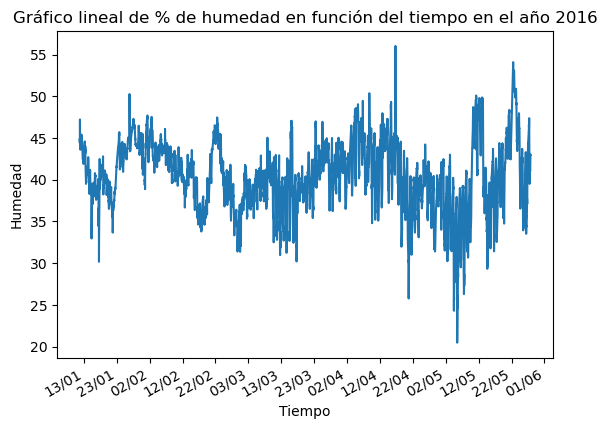

In [291]:

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) # Se define el formato de las fechas en el eje X
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Se define el intervalo en dias para el eje X

# Se genera el grafico con .plot(), se ingresan como parametros los arrays correspiendes al eje X y el eje Y
plt.plot(tiempo, humedad_sin_orden)
# Con esta funcion se cambia la posicion a los valores del eje X para que se acomoden mejor
# se deja con sus parametros por defecto: bottom=0.2, rotation=30, ha=’right’, which=None
plt.gcf().autofmt_xdate()

# Se configuran las etiquetas de los ejes y el título del grafico lineal
plt.xlabel('Tiempo')
plt.ylabel('Humedad')
plt.title("Gráfico lineal de % de humedad en función del tiempo en el año 2016")

# Se muestra el grafico
plt.show()

**Gráfico lineal para un intervalo de tiempo menor**

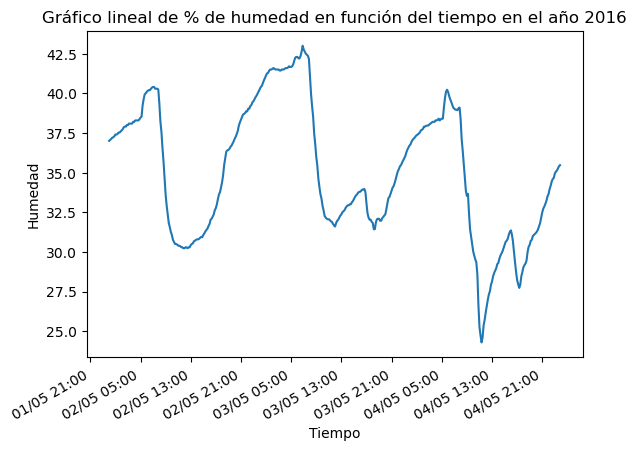

In [292]:
# Se aplica el mismo proceso que en el grafico lineal anterior
# Solamente se cambia el formato del eje X para que muestre tambien las horas,
# el intervalo a 8 horas, y se acortan los arrays con los indices i y j para mostrar
# solo una seccion de los datos

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=8))
i, j = tiempo.index(dt.datetime(2016, 5, 2, 0, 0, 0)), tiempo.index(dt.datetime(2016, 5, 5, 0, 0, 0))
plt.plot(tiempo[i:j], humedad_sin_orden[i:j])
plt.gcf().autofmt_xdate()

plt.xlabel('Tiempo')
plt.ylabel('Humedad')
plt.title("Gráfico lineal de % de humedad en función del tiempo en el año 2016")
plt.show()

**Diagrama de cajas**

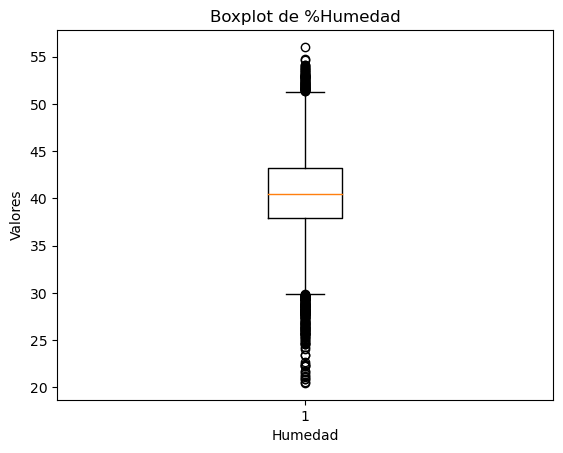

In [293]:
fig, ax = plt.subplots() # Funcion que crea una figura y set de subplots, se configuraran para generar el boxplot
ax.boxplot(humedad)      # Se especifica que el tipo sea boxplot y se pasa el array de humedad ordenado como parametro

# Se configuran las etiquetas de los ejes y el título del boxplot
ax.set_xlabel('Humedad')
ax.set_ylabel('Valores')
ax.set_title('Boxplot de %Humedad')

# Se muestra el boxplot
plt.show()

**Histograma**

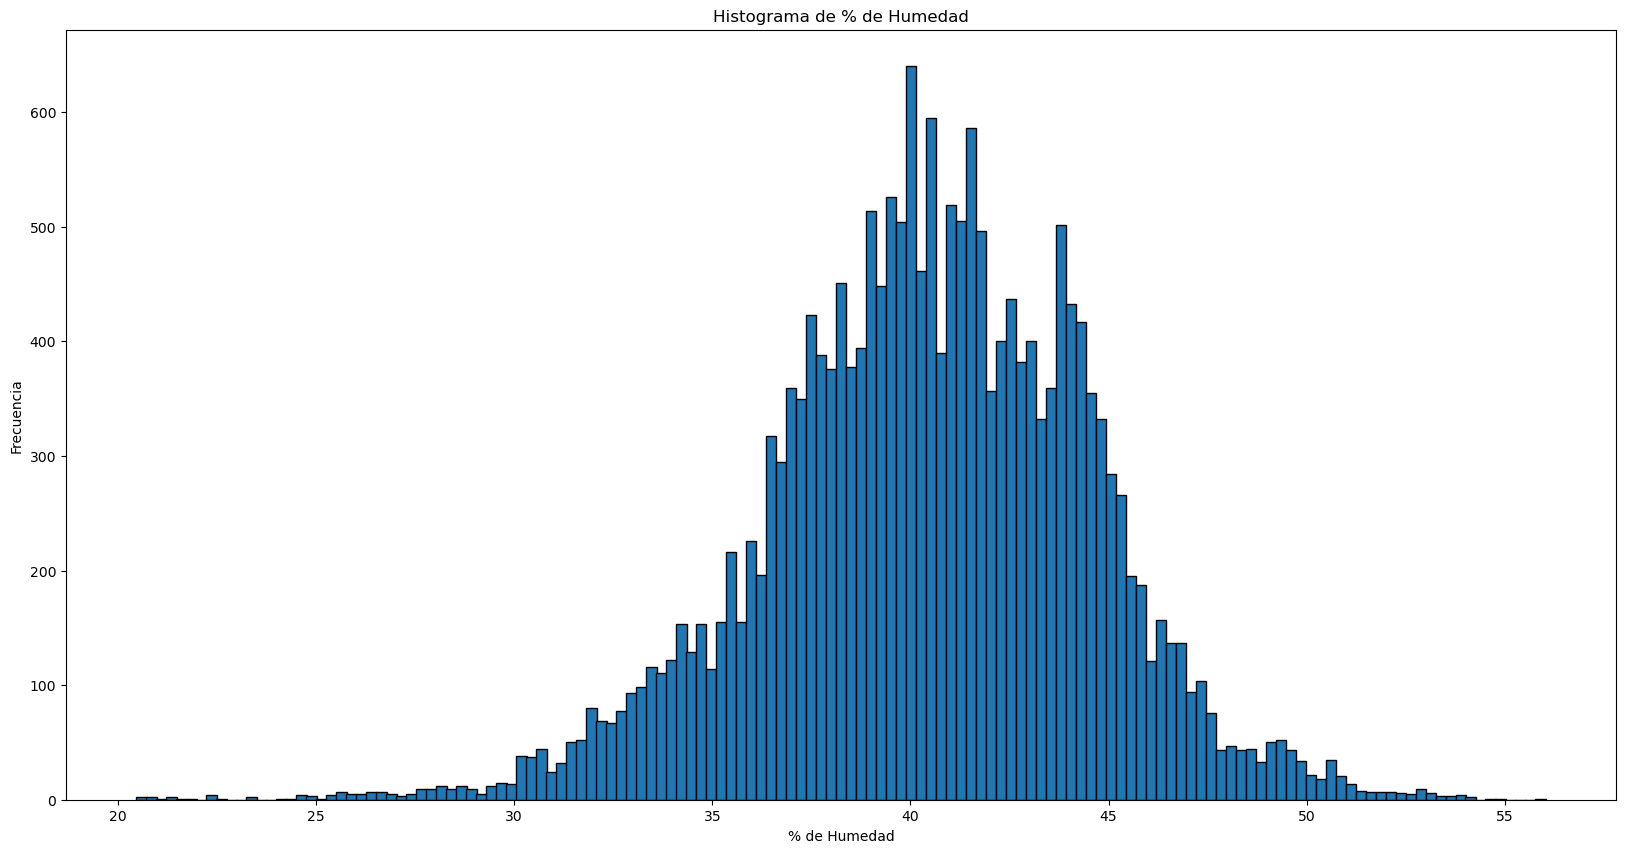

In [294]:
# Se calcula el numero de celdas, se usa ceil para redondear al entero siguiente
n_celdas = math.ceil(np.sqrt(len(humedad)))

# Se calcula el ancho del intervalo
ancho = ((_rango_muestral) * 0.05 + _rango_muestral) / n_celdas

# Se crea la figura del histograma, se le da un tamano de 20x10 pulgadas
plt.figure(figsize=(20, 10))

# Se crea el histograma, como parametros recibe el array ordenado, 
# bins: el numero de barras
# ec: color del borde negro
# range: tupla con los valores minimo y maximo del array
# width: ancho de las barras
plt.hist(humedad, bins = n_celdas, ec='black', range = (humedad[0]-2, humedad[len(humedad) - 1]+2), width = ancho)

# Se configuran las etiquetas de los ejes y el título del histograma
plt.xlabel('% de Humedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de % de Humedad')

# Se muestra el histograma
plt.show()